In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots



import pandas as pd
import xarray as xr
import seaborn as sns
import warnings

import logging

from skimage import measure 
from scipy.optimize import minimize
import plotly.graph_objects as go
from shapely.geometry import LineString
import matplotlib.patheffects as path_effects
from matplotlib.patches import Polygon as MplPolygon

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

In [2]:
alpha = "25" #compare to article this is 100(1-alpha) 
nbpd = 20 # maybe trying with 40 once the legends are added
nd = 4
same_rank_bool = True # if False then the jdist ranks are computed for ocean and land, rather than for both

fig_path = f"/scratchx/mcarenso/tempest/figures/threshold_nd_{nd}_nbpd_{nbpd}_alpha_{alpha}_same_rank_{str(same_rank_bool)}.png"

Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Data loaded from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


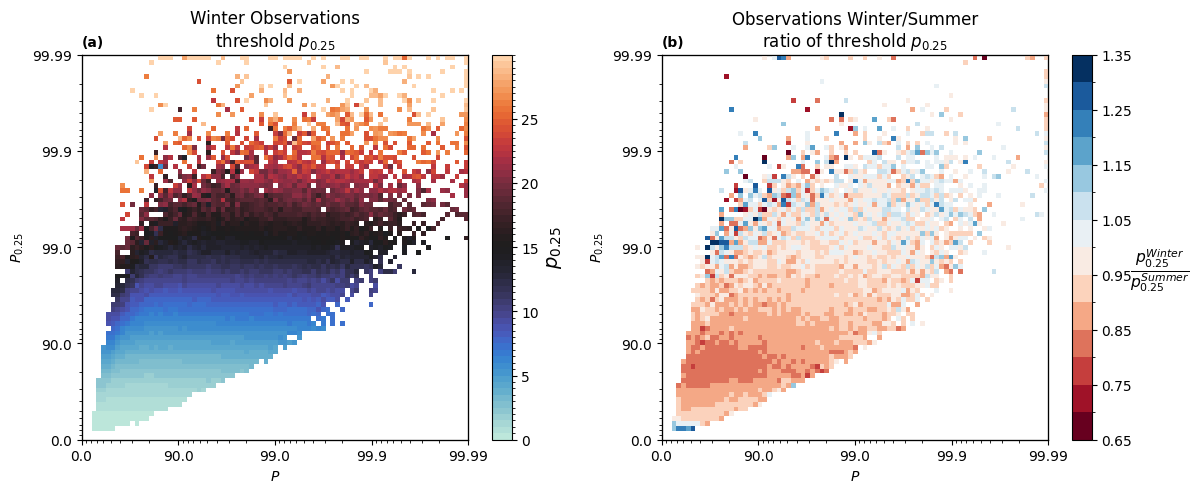

In [32]:
# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(13.72, 5))

##Preshow 
settings_path = 'settings/obs_winter_30d.yaml'
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite_storms = False, overwrite = False)
jd_winter = joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", nbpd = 20,  nd=4, overwrite = True, dist_mask = "all")

settings_path = 'settings/obs_summer_30d.yaml'
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite_storms = False, overwrite = False)
jd_summer = joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", nbpd = 20,  nd=4, overwrite = True, dist_mask = "all")

## left one
model_name = jd_winter.settings["MODEL"][:-7]
cmap = sns.color_palette("icefire", as_cmap=True)
values_and_boundaries = np.arange(0, 30.5, 0.5)
values = values_and_boundaries
boundaries  = values_and_boundaries
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

ax, cb, ax_show_, sigma_density_obs_winter = jd_winter.plot_var_id_func_over_jdist('Prec', func = 'threshold_cond_alpha_75', title=model_name, mask = "all", cmap = cmap, norm = norm, fig = fig, ax = axes[0])
_, _, _, sigma_density_obs_summer = jd_summer.plot_var_id_func_over_jdist('Prec', func = 'threshold_cond_alpha_75', title=model_name, mask = "all", cmap = cmap, norm = norm, fig = False)
axes[0].set_ylabel(r"$P_{0.25}$")
axes[0].set_xlabel(r"$P$")
cb.set_label(r"$p_{0.25}$", fontsize=14)
cb.set_ticks(np.arange(0, 30, 5))

axes[0].set_title("Winter Observations" + "\n" + "threshold " + r"$p_{0.25}$")
axes[0].text(-0., 1.05, "(a)", transform=axes[0].transAxes, fontweight='bold', va='top')

## Sigma ratio for explanation
cmap = sns.color_palette("RdBu", as_cmap=True)
values_and_boundaries = np.arange(0.65, 1.40, 0.05)
values = values_and_boundaries
boundaries  = values_and_boundaries
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

obs_season_ratio_sigma_75 = sigma_density_obs_winter/sigma_density_obs_summer
ax, cb, ax_show, sigma_density_obs_summer = jd_summer.plot_var_id_func_over_jdist('Prec', func = 'threshold_cond_alpha_75', title=model_name, mask = "all", cmap = cmap, norm = norm, fig = fig, ax = axes[1], density=obs_season_ratio_sigma_75)
axes[1].set_ylabel(r"$P_{0.25}$")
axes[1].set_xlabel(r"$P$")
# cb.set_label()
cb.ax.set_ylabel(r'$\frac{p^{Winter}_{0.25}}{p^{Summer}_{0.25}}$', fontsize=16, rotation = 0, labelpad = 20)

title = r"Observations Winter/Summer"+"\n"+ "ratio of threshold " + r"$p_{0.25}$"
axes[1].set_title(title)
# plot_kite(jd_summer, fig, ax_show)
axes[1].text(-0., 1.05, "(b)", transform=axes[1].transAxes, fontweight='bold', va='top')
# Show the plot
plt.savefig(fig_path, dpi = 300)
plt.show()